In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv("/content/raw_data.csv")
df.head()

,track_id,title,artist_name,song_id,release,tempo,duration,loudness,key,mode,time_signature,year
0,TRAAAAW128F429D538,I Didn't Mean To,Casual,SOMZWCG12A8C13C480,Fear Itself,92.198,218.93179,-11.197,1,0,4,0
1,TRAAABD128F429CF47,Soul Deep,The Box Tops,SOCIWDW12A8C13D406,Dimensions,121.274,148.03546,-9.843,6,0,4,1969
2,TRAAADZ128F9348C2E,Amor De Cabaret,Sonora Santanera,SOXVLOJ12AB0189215,Las Numero 1 De La Sonora Santanera,100.070,177.47546,-9.689,8,1,1,0
3,TRAAAEF128F4273421,Something Girls,Adam Ant,SONHOTT12A8C13493C,Friend Or Foe,119.293,233.40363,-9.013,0,1,4,1982
4,TRAAAFD128F92F423A,Face the Ashes,Gob,SOFSOCN12A8C143F5D,Muertos Vivos,129.738,209.60608,-4.501,2,1,4,2007


In [4]:
df.shape

(10000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   track_id        10000 non-null  object 
 1   title           9999 non-null   object 
 2   artist_name     10000 non-null  object 
 3   song_id         10000 non-null  object 
 4   release         10000 non-null  object 
 5   tempo           10000 non-null  float64
 6   duration        10000 non-null  float64
 7   loudness        10000 non-null  float64
 8   key             10000 non-null  int64  
 9   mode            10000 non-null  int64  
 10  time_signature  10000 non-null  int64  
 11  year            10000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 937.6+ KB


In [6]:
df.isna().sum()

,0
track_id,0
title,1
artist_name,0
song_id,0
release,0
tempo,0
duration,0
loudness,0
key,0
mode,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,tempo,duration,loudness,key,mode,time_signature,year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,122.915449,238.507518,-10.485668,5.276100,0.691100,3.564800,934.704600
std,35.184412,114.137514,5.399788,3.554087,0.462063,1.266239,996.650657
min,0.000000,1.044440,-51.643000,0.000000,0.000000,0.000000,0.000000
25%,96.965750,176.032200,-13.163250,2.000000,0.000000,3.000000,0.000000
50%,120.161000,223.059140,-9.380000,5.000000,1.000000,4.000000,0.000000
75%,144.013250,276.375060,-6.532500,8.000000,1.000000,4.000000,2000.000000
max,262.828000,1819.767710,0.566000,11.000000,1.000000,7.000000,2010.000000


In [9]:
df.drop(columns=['track_id','title','song_id'],inplace=True)
df.head()

,artist_name,release,tempo,duration,loudness,key,mode,time_signature,year
0,Casual,Fear Itself,92.198,218.93179,-11.197,1,0,4,0
1,The Box Tops,Dimensions,121.274,148.03546,-9.843,6,0,4,1969
2,Sonora Santanera,Las Numero 1 De La Sonora Santanera,100.070,177.47546,-9.689,8,1,1,0
3,Adam Ant,Friend Or Foe,119.293,233.40363,-9.013,0,1,4,1982
4,Gob,Muertos Vivos,129.738,209.60608,-4.501,2,1,4,2007


In [12]:
cat = df.select_dtypes(include=['object'])

for col in cat.columns:
  print(f"features: {col}")
  print(df[col].nunique())
  print('-'*30)

features: artist_name
4412
------------------------------
features: release
7834
------------------------------


In [13]:
for col in cat.columns:
  print(f"features: {col}")
  print(df[col].value_counts())
  print('-'*30)

features: artist_name
artist_name
Mario Rosenstock                           13
Aerosmith                                  12
Sugar Minott                               12
Phil Collins                               12
The Jackson Southernaires                  12
                                           ..
Willie Isz                                  1
Hassan Annouri                              1
Drop Dead_ Gorgeous                         1
Dilated Peoples Featuring Black Thought     1
Sane Band                                   1
Name: count, Length: 4412, dtype: int64
------------------------------
features: release
release
Greatest Hits                          21
Live                                   15
Original Album Classics                14
The Very Best Of                       11
The Best Of                            11
                                       ..
Placer & Castigo                        1
The Way Home                            1
Las Numero 1 De La Sonora S

In [23]:
num = df.drop(columns=cat.columns)
num.columns

Index(['tempo', 'duration', 'loudness', 'key', 'mode', 'time_signature',
       'year'],
      dtype='object')

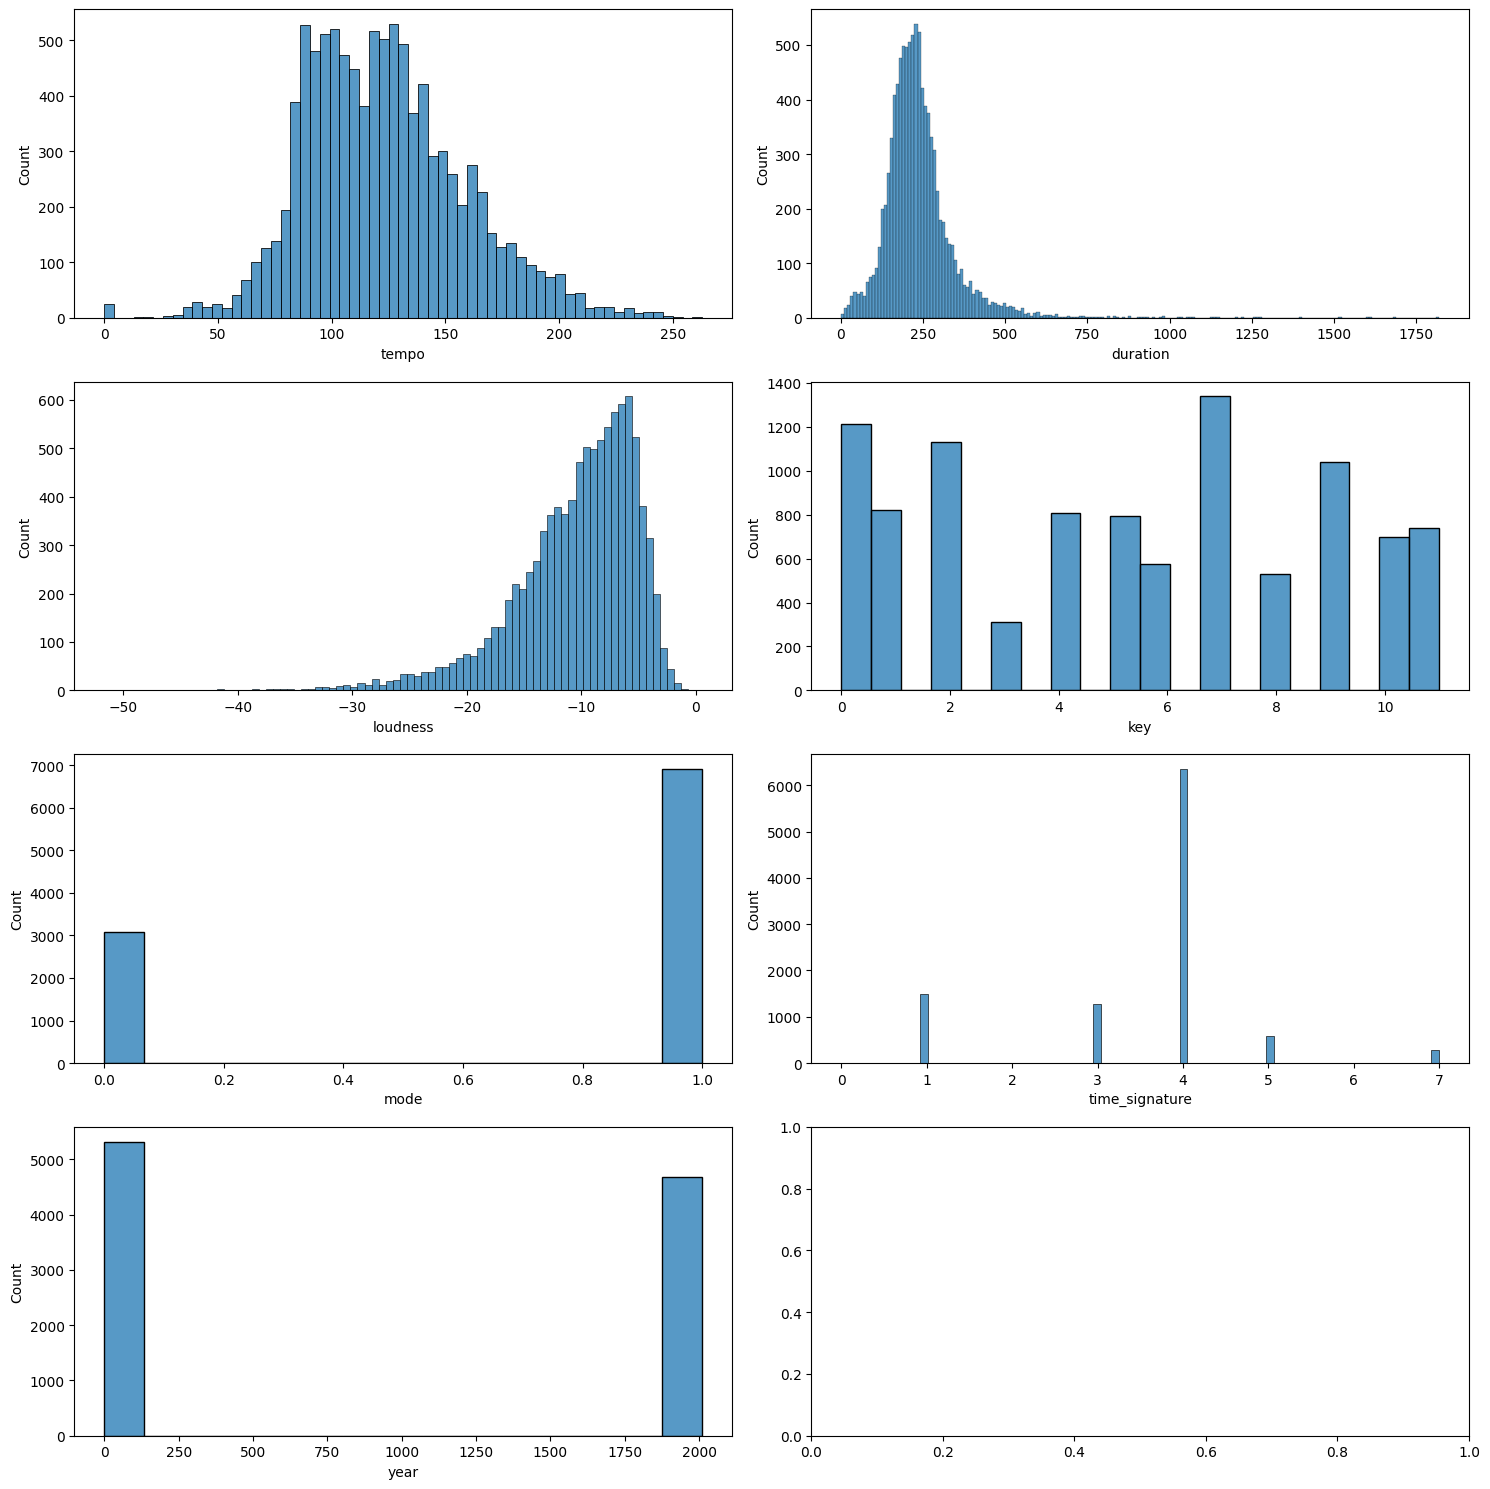

In [24]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

for i, col in enumerate(num.columns):
    sns.histplot(data=num, x=col, ax=axes[i // 2, i % 2])

plt.tight_layout()
plt.show()

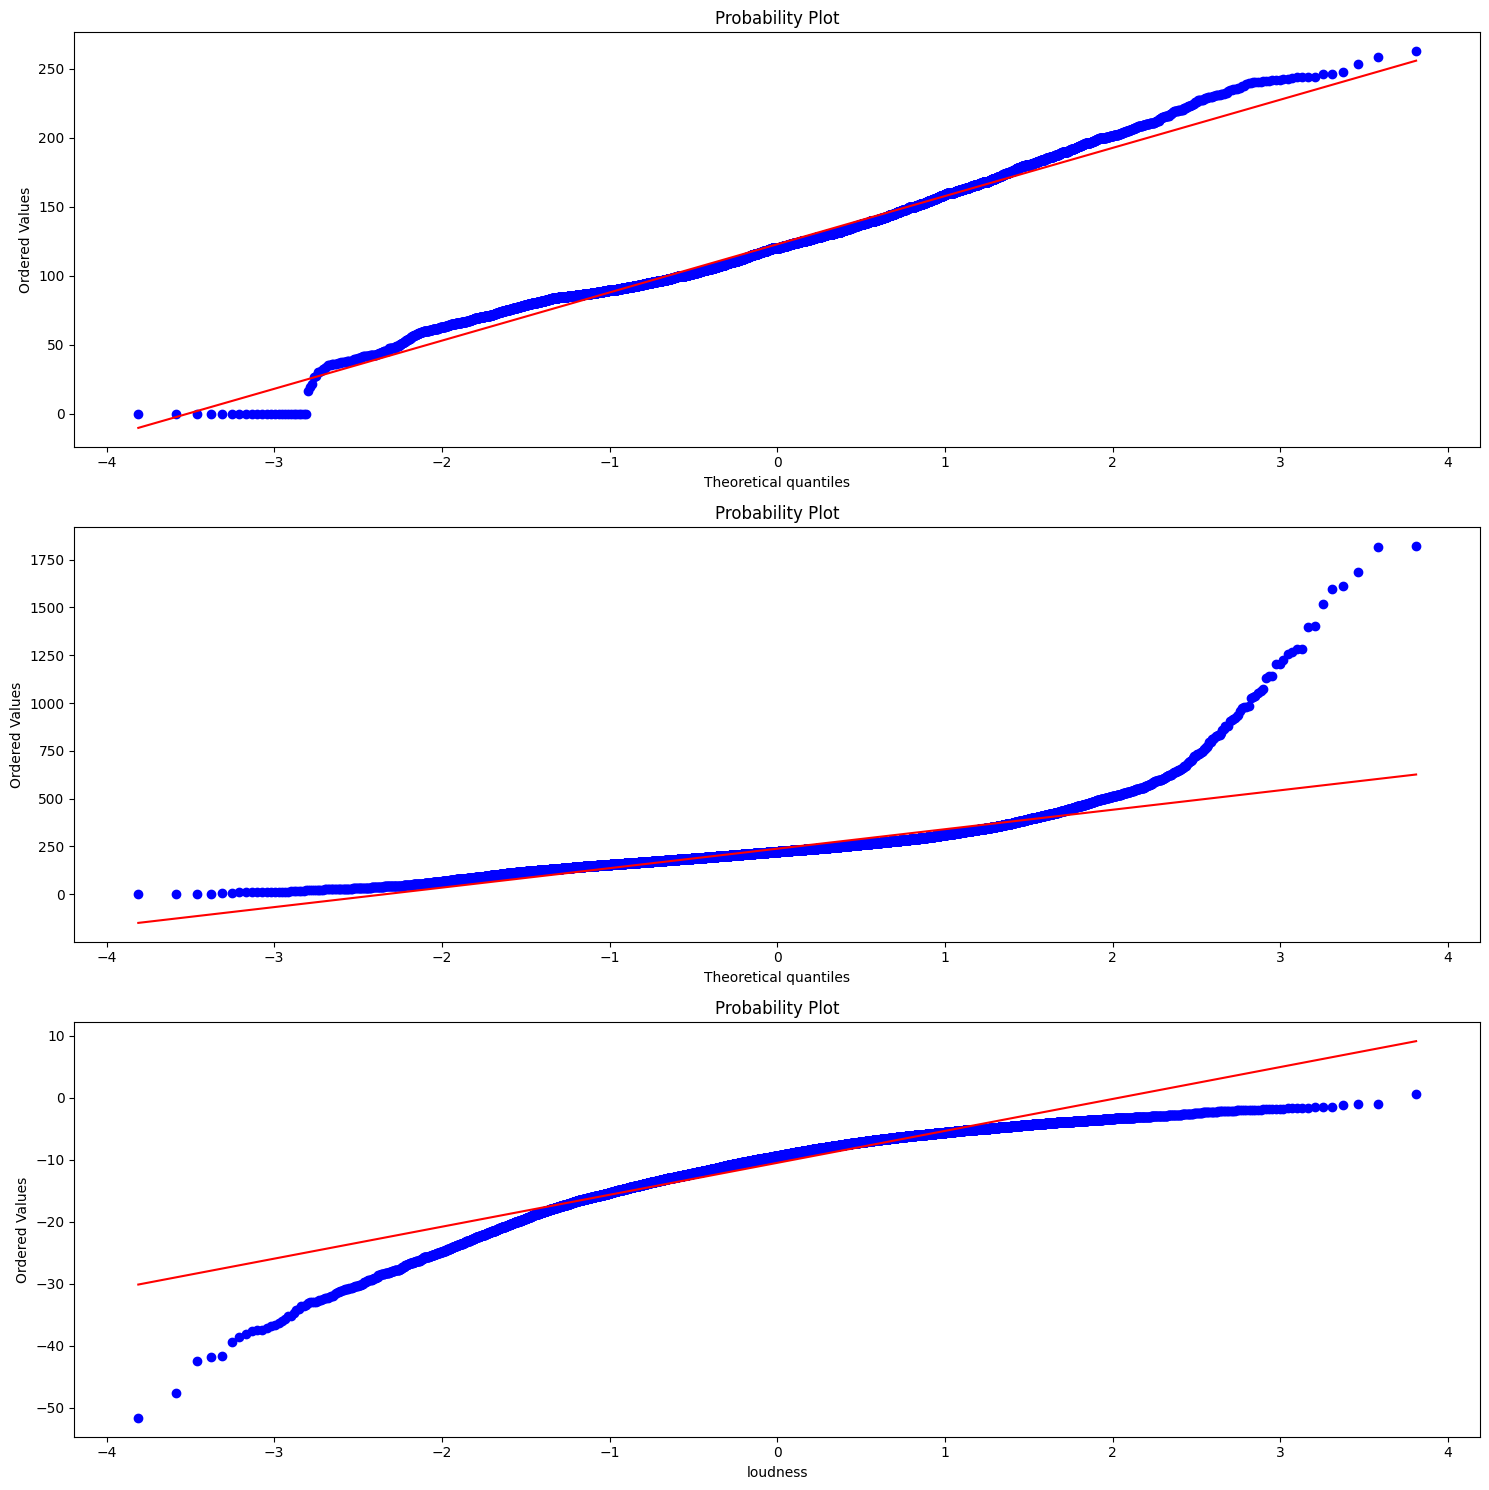

In [33]:
import scipy.stats as stats

cols = ['tempo','duration','loudness']
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

for i, col in enumerate(cols):
    stats.probplot(num[col], dist='norm', plot=axes[i])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [40]:
from sklearn.preprocessing import PowerTransformer

cols2 = ['duration','loudness']
pt = PowerTransformer()
num_trf = pt.fit_transform(num[cols2])
num_trf = pd.DataFrame(num_trf, columns=cols2)
num_trf.head()

,duration,loudness
0,-0.047235,-0.359597
1,-0.871305,-0.097880
2,-0.502404,-0.066051
3,0.097865,0.079351
4,-0.144197,1.415173


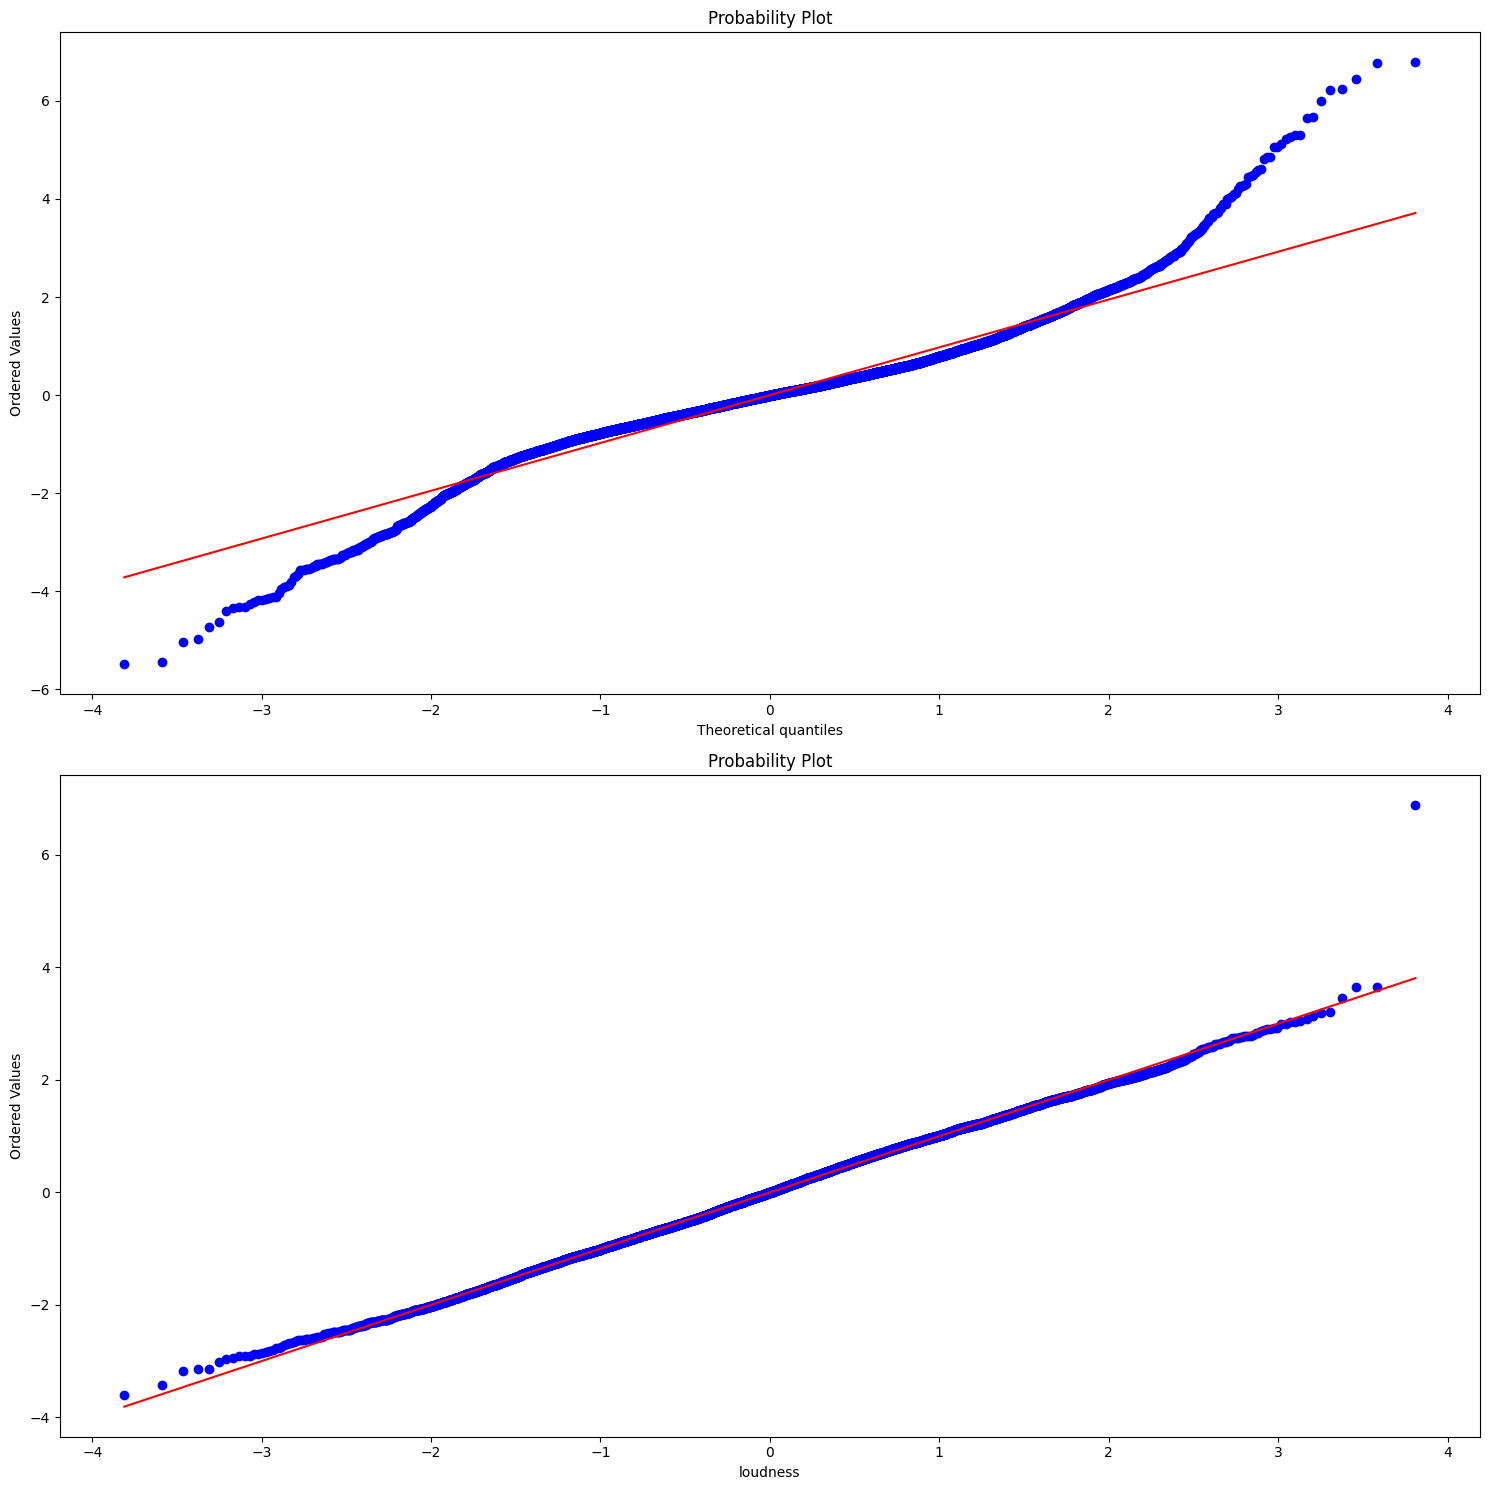

In [41]:
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

for i, col in enumerate(cols2):
    stats.probplot(num_trf[col], dist='norm', plot=axes[i])
    plt.xlabel(f"{col}")

plt.tight_layout()
plt.show()

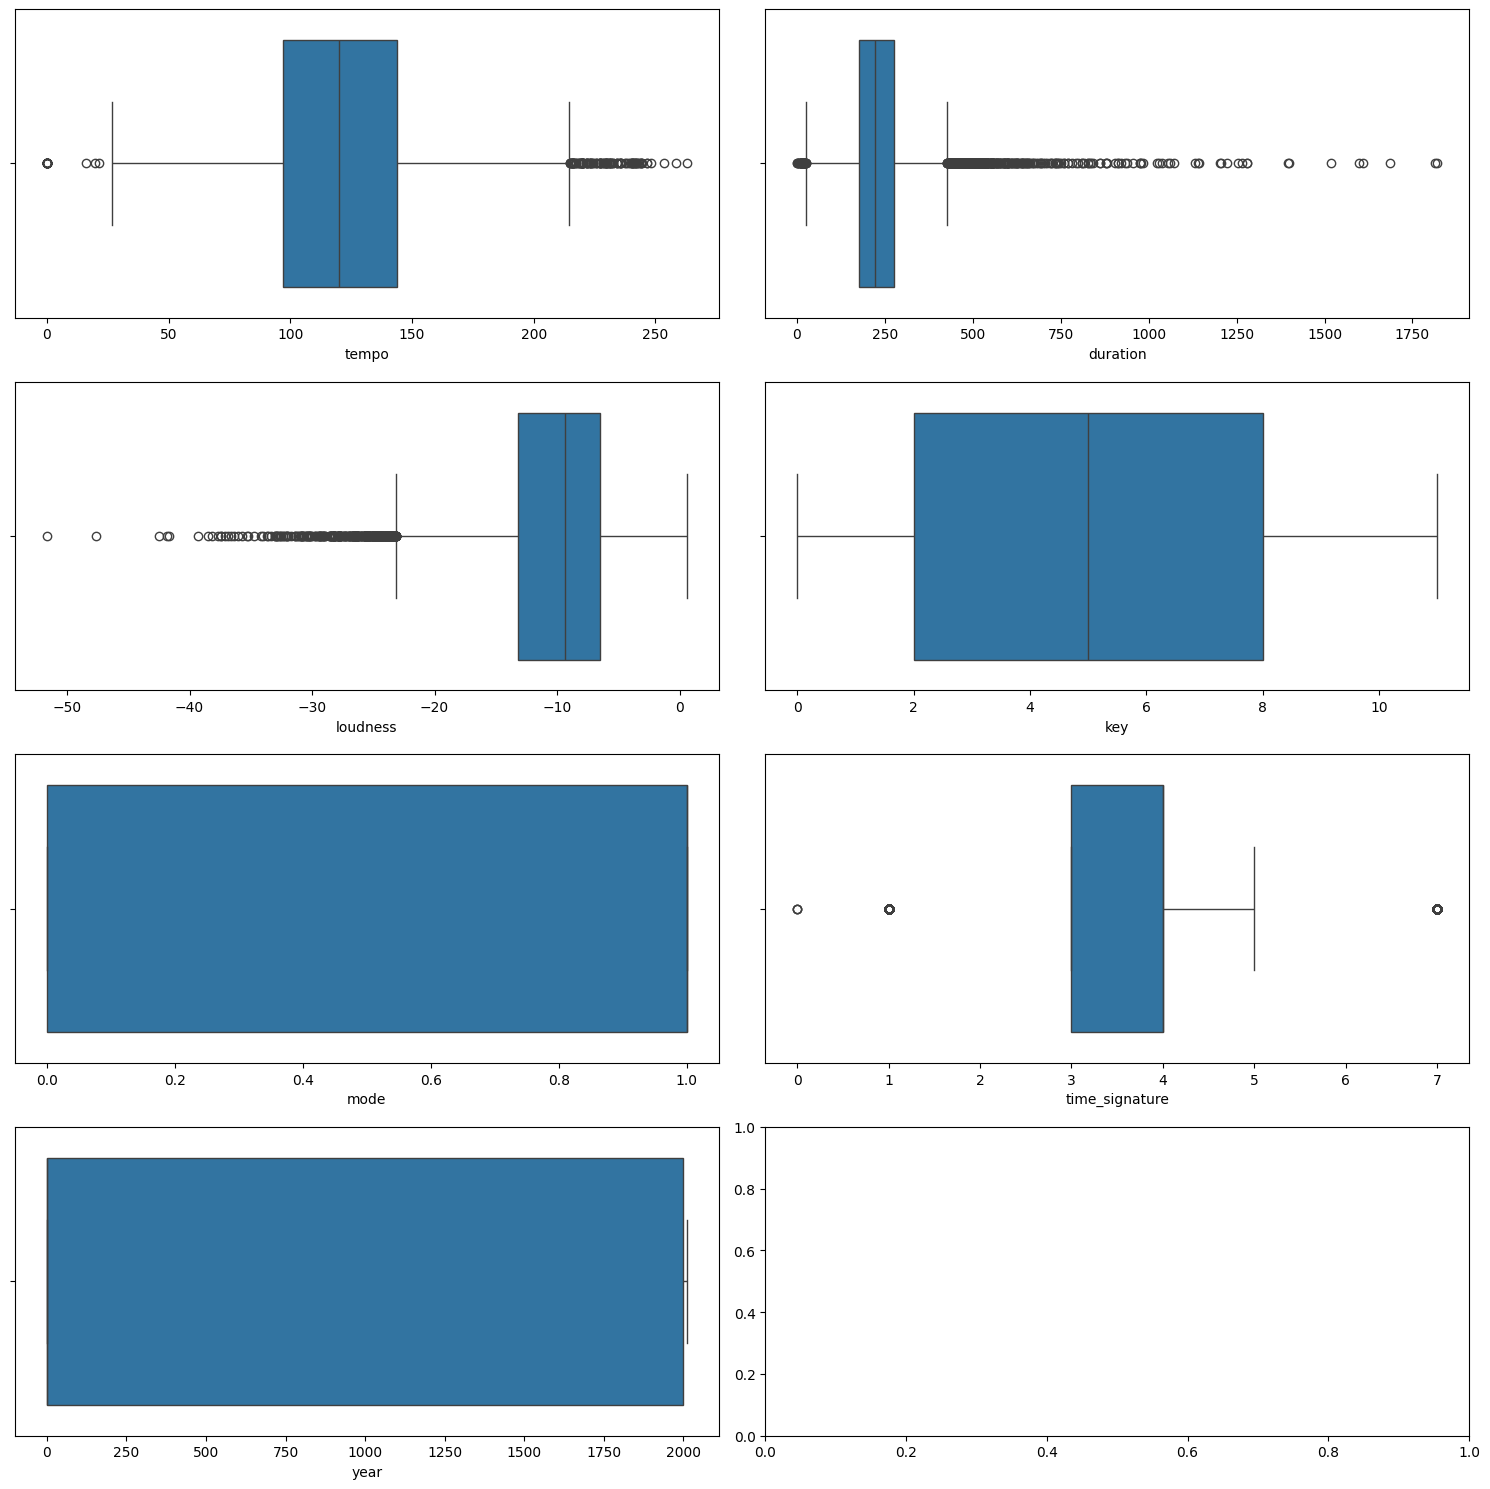

In [42]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

for i, col in enumerate(num.columns):
    sns.boxplot(data=num, x=col, ax=axes[i // 2, i % 2])

plt.tight_layout()
plt.show()